In [ ]:
!pip install tensorflow

In [1]:
#import all library required

import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPool2D,
    Dense,
    BatchNormalization,
    ReLU,
    Dropout,
    Flatten,
    Concatenate,
    GlobalAvgPool2D
)

from tensorflow.keras.regularizers import L2


In [4]:
#read Dataset
df_train=pd.read_csv("/content/drive/MyDrive/facial-keypoints-detection-jadi/training.zip")

In [5]:
df_train.head(1)

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   

   mouth_center_bottom_lip_y  \
0                  84.485774   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  

[1 rows x 31 columns]

In [6]:
df_train.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        7039.000000        7039.000000         7036.000000   
mean           66.359021          37.651234           30.306102   
std             3.448233           3.152926            3.083230   
min            22.763345           1.616512            0.686592   
25%            65.082895          35.900451           28.783339   
50%            66.497566          37.528055           30.251378   
75%            68.024752          39.258449           31.768334   
max            94.689280          80.502649           85.039381   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         7036.000000              2271.000000              2271.000000   
mean            37.976943                59.159339                37.944752   
std              3.033621                 2.690354                 2.307332   
min              4.091264                19.064954                27.190098   
25%             36.327681                58.039339                36.626283   
50%             37.813273                59.304615                37.878040   
75%             39.566729                60.519810                39.260348   
max             81.270911                84.440991                66.562559   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2267.000000              2267.000000   
mean                 73.330478                37.707008   
std                   3.405852                 2.881438   
min                  27.571879                26.250023   
25%                  71.716503                36.085523   
50%                  73.247824                37.639015   
75%                  75.015645                39.373489   
max                  95.258090                64.618230   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2268.000000               2268.000000  ...  7049.000000   
mean                  36.652607                 37.989902  ...    48.374186   
std                    2.350268                  2.311907  ...     4.280038   
min                    5.751046                 26.250023  ...    12.944699   
25%                   35.506126                 36.766783  ...    46.602370   
50%                   36.651562                 37.944075  ...    48.424713   
75%                   37.753571                 39.192917  ...    50.330437   
max                   70.714966                 69.808803  ...    89.438592   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  7049.000000          2269.000000          2269.000000   
mean     62.715884            63.285735            75.970714   
std       5.720567             4.079063             4.579724   
min      17.932414            22.923362            57.023258   
25%      59.292697            61.257143            72.875707   
50%      63.451421            63.178286            75.778689   
75%      66.492686            65.376243            78.879123   
max      95.935644            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2270.000000           2270.000000             2275.000000   
mean              32.900404             76.179768               47.975412   
std                3.964552              4.417814                3.323060   
min                2.245766             56.690208               12.605173   
25%               30.797646             73.256472               46.494571   
50%               32.982305             76.000592               47.905490   
75%               35.101302             78.956357               49.296488   
max               74.017993             95.510678               83.989082   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2275.000000                7016.000000   
mean                72.919443                  48.569472

In [7]:
feature_col,target_col="Image",list(df_train.drop("Image",axis=1).columns)

In [8]:
df_train[target_col] = df_train[target_col].fillna(df_train[target_col].mean())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7049 non-null   float64
 1   left_eye_center_y          7049 non-null   float64
 2   right_eye_center_x         7049 non-null   float64
 3   right_eye_center_y         7049 non-null   float64
 4   left_eye_inner_corner_x    7049 non-null   float64
 5   left_eye_inner_corner_y    7049 non-null   float64
 6   left_eye_outer_corner_x    7049 non-null   float64
 7   left_eye_outer_corner_y    7049 non-null   float64
 8   right_eye_inner_corner_x   7049 non-null   float64
 9   right_eye_inner_corner_y   7049 non-null   float64
 10  right_eye_outer_corner_x   7049 non-null   float64
 11  right_eye_outer_corner_y   7049 non-null   float64
 12  left_eyebrow_inner_end_x   7049 non-null   float64
 13  left_eyebrow_inner_end_y   7049 non-null   float

In [9]:
target_col

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [10]:
IMG_WIDTH=96
IMG_HEIGHT=96
IMG_CANNELS=1
images=np.array(df_train[feature_col].str.split().tolist(),dtype="float").reshape(-1,IMG_HEIGHT,IMG_WIDTH,IMG_CANNELS)
labels=df_train[target_col].to_numpy()

In [11]:
# scale image from 0 -255 to 0-1 for better training
scaled_images=images/255.0

In [ ]:
labels

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 72.9194426 ,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 72.9194426 ,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 72.9194426 ,
        45.90048   , 82.7730963 ]])

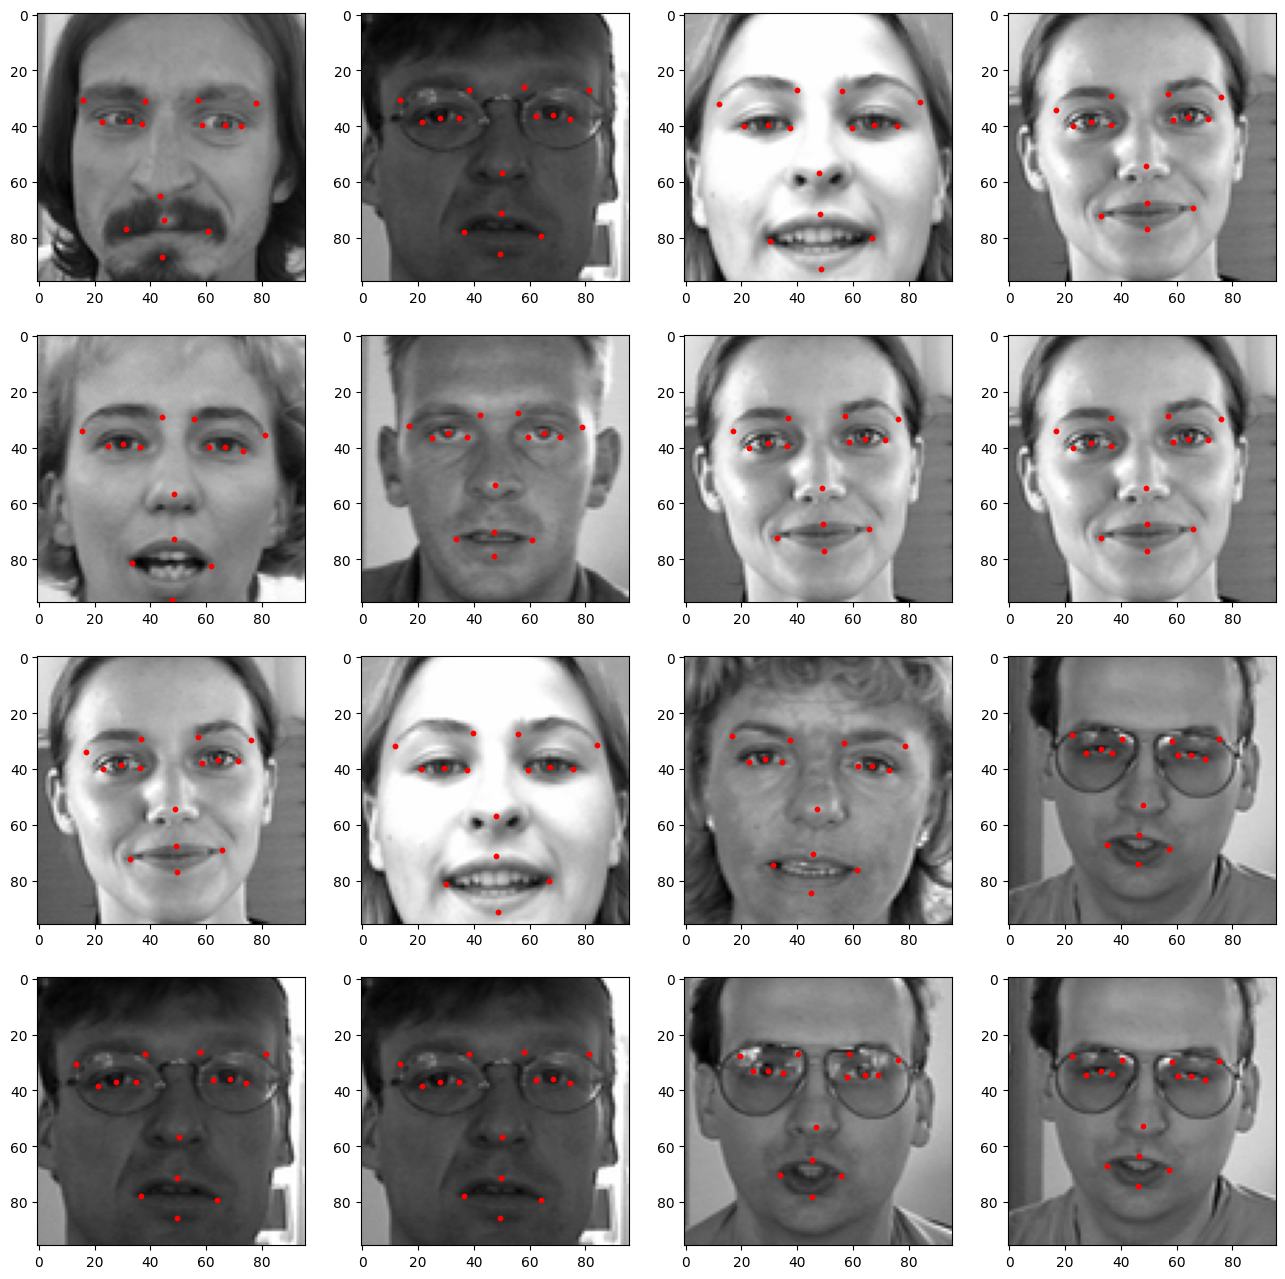

In [12]:
# let's make a function to show training dataset visual
#
def show_examples(images, landmarks):
  # make a figure consist of 16 images
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
    # looping through each image
    for img, marks, ax in zip(images, landmarks, axes.ravel()):
        # Keypoints
        # every odd values are x coordinate
        # every even values are y coodinate
        x_points = marks[:: 2]
        y_points = marks[1::2]

        # display on figure
        ax.imshow(img.squeeze(), cmap='gray')
        ax.scatter(x_points, y_points, s=10, color='red')

    plt.show()


idx = np.random.choice(16, 16)
show_examples(images[idx], labels[idx])

In [13]:
# spliting training dataset for training and validation
train_image,valid_images,train_labels,valid_labels=train_test_split(scaled_images,labels,test_size=0.1,random_state=7)
# 10 % of data is for validation
# 90 % of data is for traiing
# shuffle dataset before spliting with randam state of 7

In [14]:
valid_labels

array([[64.935735  , 35.964435  , 28.71186   , ..., 72.9194426 ,
        49.062345  , 77.07243   ],
       [62.33730612, 35.95533061, 32.5675102 , ..., 68.35134694,
        49.20293878, 76.90122449],
       [65.77105778, 36.69297778, 31.51169778, ..., 72.9194426 ,
        49.34055111, 78.29363556],
       ...,
       [69.39087719, 36.3648    , 27.88861754, ..., 72.9194426 ,
        50.02318596, 77.47177544],
       [67.3868323 , 43.9826087 , 28.9868323 , ..., 77.7152795 ,
        38.08312334, 91.43552795],
       [65.73522581, 34.45099355, 29.47509677, ..., 66.55896774,
        51.34203871, 81.22900645]])

In [ ]:
# Let's start with model
# We will create CNN model that uses Inception Architecture
def inception_module(inputs,f1,f2):
    # defining convolution 2d layer
    x1=Conv2D(f1,3,padding="same")(inputs)
    # batchnormalize the x1
    x1=BatchNormalization()(x1)
    x1=ReLU()(x1)

    # it was f1 change it to f2
    x2=Conv2D(f2,5,padding="same")(inputs)
    # batchnormalize the x1
    x2=BatchNormalization()(x2)
    x2=ReLU()(x2)
    # combine x1 and x2
    return Concatenate()([x1,x2])

In [ ]:
def build_model():
    inputs = Input((96, 96, 1))

    x = inception_module(inputs, 64,  32)
    x = MaxPool2D()(x)

    x = inception_module(x, 64,  32)
    x = MaxPool2D()(x)

    x = inception_module(x, 128, 32)
    x = MaxPool2D()(x)

    x = inception_module(x, 128, 32)
    x = MaxPool2D()(x)

    x = inception_module(x, 256, 64)
    x = MaxPool2D()(x)

    x = Flatten()(x)
    x = Dense(1024, kernel_regularizer=L2(l2=0.05))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Dense(512, kernel_regularizer=L2(l2=0.02))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Dense(128, kernel_regularizer=L2(l2=0.01))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Dense(30)(x)

    model = tf.keras.Model(inputs, outputs=x)
    return model

model = build_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 96, 96, 64)     │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 96, 96, 32)     │            832 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 96, 96, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 96, 96, 32)     │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 96, 96, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 96, 96, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96, 96, 96)     │              0 │ re_lu[0][0],           │
│                           │                        │                │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 48, 48, 96)     │              0 │ concatenate[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 48, 48, 64)     │         55,360 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 48, 48, 32)     │         76,832 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 48, 48, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 48, 48, 32)     │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 48, 48, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 48, 48, 32)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 48, 48, 96)     │              0 │ re_lu_2[0][0],         │
│ (Concatenate)             │                        │                │ re_lu_3[0][0]          │
├──────────────────────

 Total params: 4,813,118 (18.36 MB)

 Trainable params: 4,808,126 (18.34 MB)

 Non-trainable params: 4,992 (19.50 KB)

In [ ]:
#compile model
# you can change this value to get better accuracy
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [ ]:
ckp_path = "trained_model/model_weights.weights.h5"  # Add .weights to the file name
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=ckp_path,
    monitor="val_mae",
    mode="auto",
    save_best_only=True,
    save_weights_only=True
)


In [ ]:
# create a lr reducer which decrease learning rate when accuarcy does not increase
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.9,monitor="val_mae",
                                             mode="auto",cooldown=0,
                                             patience=5,verbose=1,min_lr=1e-5)
# patience : wait till 5 epoch
# verbose : show accuracy every 1 epoch
# min_lr=minimum learning rate
#

In [ ]:
train_labels

array([[66.37939592, 31.03954286, 29.13482449, ..., 72.9194426 ,
        48.21884082, 75.9792    ],
       [66.57870423, 39.94073239, 29.19819718, ..., 79.44878873,
        44.39323944, 93.42828169],
       [67.00873846, 39.89981538, 30.70596923, ..., 75.87249231,
        47.86707692, 92.37341538],
       ...,
       [65.70105263, 37.328     , 24.30315789, ..., 70.82273684,
        48.76547368, 86.25263158],
       [66.83671137, 38.77588338, 28.59568513, ..., 72.99162682,
        48.35657143, 88.90999417],
       [67.315968  , 37.40386909, 31.033728  , ..., 72.9194426 ,
        53.43016145, 78.61317818]])

In [ ]:
# Training model
EPOCHS=300
BATCH_SIZE=256

history=model.fit(train_image,
                 train_labels,
                 validation_data=(valid_images,valid_labels),
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 callbacks=[model_checkpoint,reduce_lr]
                 )
# found the error
# we are getting NaN value in training because there is NaN in train set

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - loss: 2660.6082 - mae: 47.2495 - val_loss: 2321.4097 - val_mae: 43.5604 - learning_rate: 0.0010
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 268ms/step - loss: 2471.2068 - mae: 45.5858 - val_loss: 1928.9330 - val_mae: 39.3419 - learning_rate: 0.0010
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - loss: 2269.1714 - mae: 43.5923 - val_loss: 2149.3235 - val_mae: 42.2818 - learning_rate: 0.0010
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - loss: 2062.4084 - mae: 41.2799 - val_loss: 2016.7198 - val_mae: 40.7563 - learning_rate: 0.0010
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - loss: 1850.1072 - mae: 38.7226 - val_loss: 2074.2600 - val_mae: 41.4703 - learning_rate: 0.0010
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - loss: 1640.2632 - mae: 35.9999 - val_loss: 1750.5280 - val_mae: 37.5238 - learning_rate: 0.0010
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - loss: 1432.3273 - mae: 33.1130 - va

In [ ]:
model.load_weights(ckp_path)

In [ ]:
# Save the entire model (architecture + weights)
model.save("trained_model/model_full.h5")

In [ ]:
# for testing if model prediction is correct or not
# use test dataset
df_test=pd.read_csv("/content/drive/MyDrive/facial-keypoints-detection-jadi/test.zip")
df_test.head(1)

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...

In [ ]:
test_images=np.array(df_test["Image"].str.split().tolist(),dtype="float").reshape(-1,96,96,1)

In [ ]:
scale_test_images=test_images/255.0

In [ ]:
prediction_val=model.predict(scale_test_images,batch_size=BATCH_SIZE)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


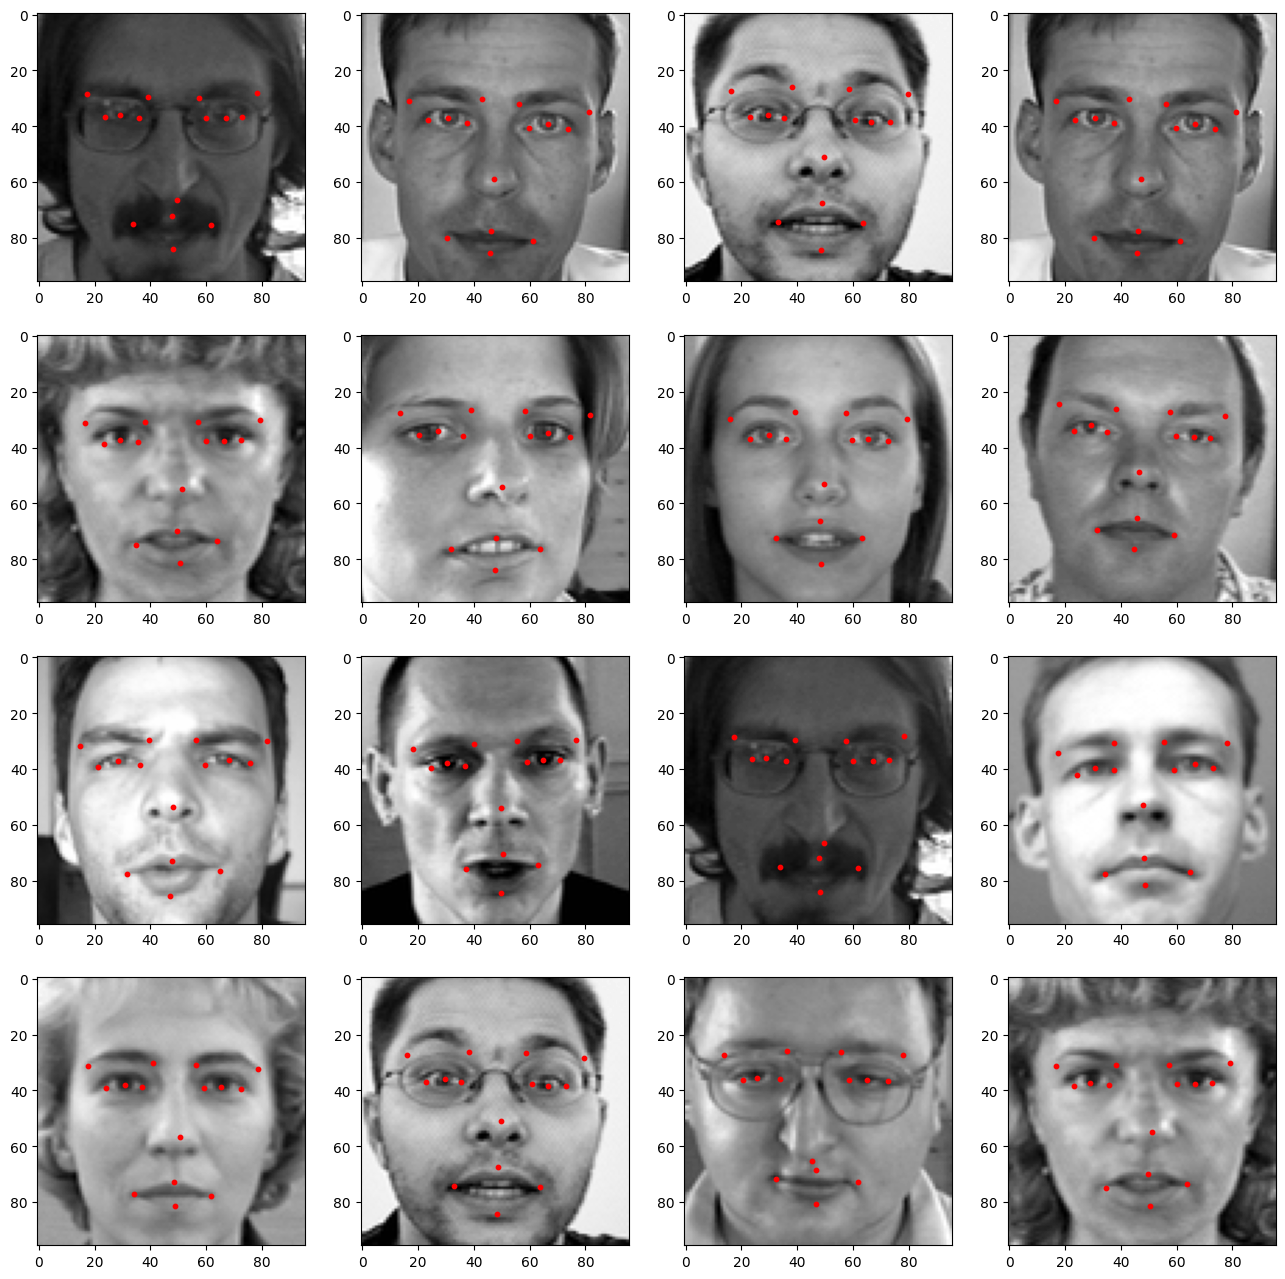

In [ ]:
# draw figure using matplot
idx=np.random.choice(16,16)
show_examples(test_images[idx],prediction_val[idx])

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WIN_20241204_11_33_43_Pro.jpg to WIN_20241204_11_33_43_Pro.jpg


In [ ]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')

In [ ]:
if face_cascade.empty():
    raise IOError('Haar Cascade classifier file tidak ditemukan!')

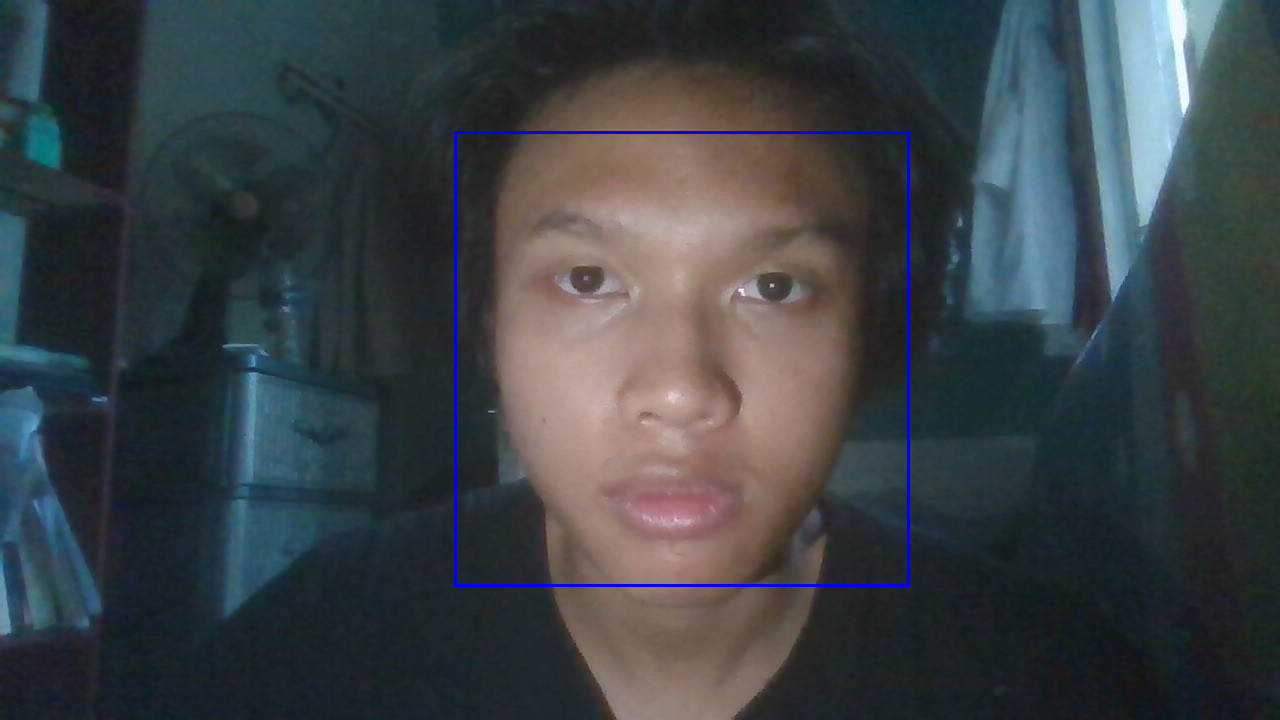

In [ ]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# Gambar kotak di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
cv2_imshow(image)

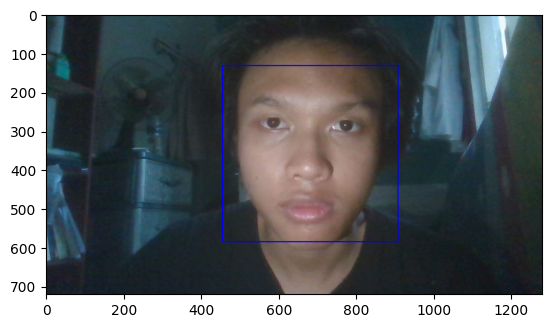

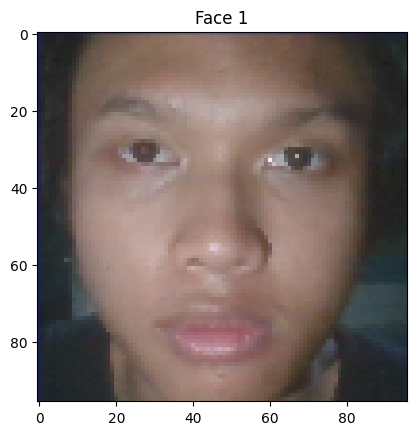

In [ ]:
cropped_faces = []
for (x, y, w, h) in faces:
    # Crop wajah
    face = image[y:y+h, x:x+w]

    # Resize wajah ke ukuran 96x96
    resized_face = cv2.resize(face, (96, 96))
    cropped_faces.append(resized_face)

    # Gambar kotak di sekitar wajah yang terdeteksi
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
plt.imshow(image_rgb)
plt.show()

# Menampilkan wajah yang telah di-crop dan di-resize
for idx, cropped_face in enumerate(cropped_faces):
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))  # Konversi ke RGB
    plt.title(f"Face {idx+1}")
    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load model
model_path = '/content/trained_model/model_full.h5'  # Ganti dengan path model Anda
model = tf.keras.models.load_model(model_path)

# Fungsi preprocessing wajah
def preprocess_face(face):
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale
    face_resized = cv2.resize(face_gray, (96, 96))  # Resize ke 96x96
    face_normalized = face_resized / 255.0  # Normalisasi piksel
    face_input = np.expand_dims(face_normalized, axis=-1)  # Tambahkan channel (1)
    face_input = np.expand_dims(face_input, axis=0)  # Tambahkan batch (1, 96, 96, 1)
    return face_input

# Proses setiap wajah yang di-crop
for idx, cropped_face in enumerate(cropped_faces):
    # Preprocess wajah
    face_input = preprocess_face(cropped_face)

    # Prediksi keypoints
    keypoints = model.predict(face_input)  # Output (1, N*2)
    keypoints = keypoints.reshape(-1, 2)  # Ubah ke bentuk (N, 2)

    # Tampilkan array keypoints
    print(f"Face {idx+1} Keypoints Array:")
    print(keypoints)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
Face 1 Keypoints Array:
[[69.60437  34.924576]
 [27.501455 33.129883]
 [59.679493 37.2668  ]
 [74.35601  37.088905]
 [36.020958 36.99709 ]
 [21.873646 37.43508 ]
 [56.199368 29.519026]
 [80.62022  29.866238]
 [39.22834  29.211847]
 [15.388165 30.043016]
 [48.25199  63.928055]
 [61.95613  76.16165 ]
 [33.46805  76.10456 ]
 [47.866497 72.64185 ]
 [47.599712 80.3098  ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


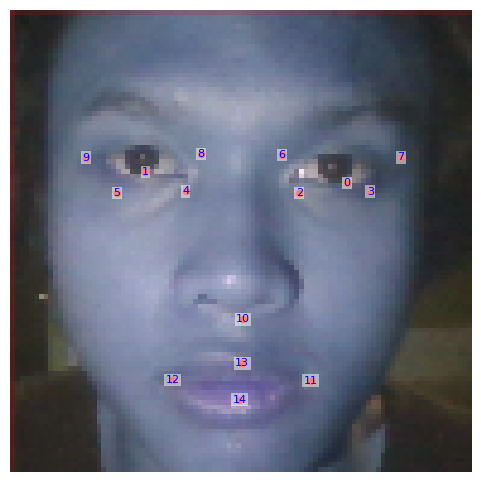

In [ ]:
def show_example(image, keypoints, landmark_labels=None):
    """
    Menampilkan satu gambar dengan keypoints beserta label atau nomor indeks di setiap titik.

    Parameters:
    - image: Gambar input dalam format grayscale (H, W) atau (H, W, 1)
    - keypoints: Array keypoints dalam format (N, 2)
    - landmark_labels: List label untuk setiap keypoint (default: None)
    """
    # Pisahkan koordinat x dan y
    x_points = keypoints[:, 0]
    y_points = keypoints[:, 1]

    # Plot gambar dan keypoints
    plt.figure(figsize=(6, 6))
    plt.imshow(image.squeeze(), cmap='gray')  # Tampilkan gambar
    plt.scatter(x_points, y_points, s=20, color='red')  # Plot keypoints

    # Tambahkan nomor indeks atau label di setiap keypoint
    for i, (x, y) in enumerate(keypoints):
        label = landmark_labels[i] if landmark_labels is not None else str(i)
        plt.text(x, y, label, color='blue', fontsize=8, ha='center', va='center',
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

    plt.axis('off')  # Hilangkan axis untuk estetika
    plt.show()

# Ambil satu cropped face dan prediksi keypoints-nya
cropped_face = cropped_faces[0]  # Pilih wajah pertama atau indeks lainnya
face_input = preprocess_face(cropped_face)

# Prediksi keypoints
keypoints = model.predict(face_input).reshape(-1, 2)

# Tampilkan gambar dan keypoints
show_example(cropped_face, keypoints)

Saving WIN_20241204_11_33_44_Pro.jpg to WIN_20241204_11_33_44_Pro (1).jpg


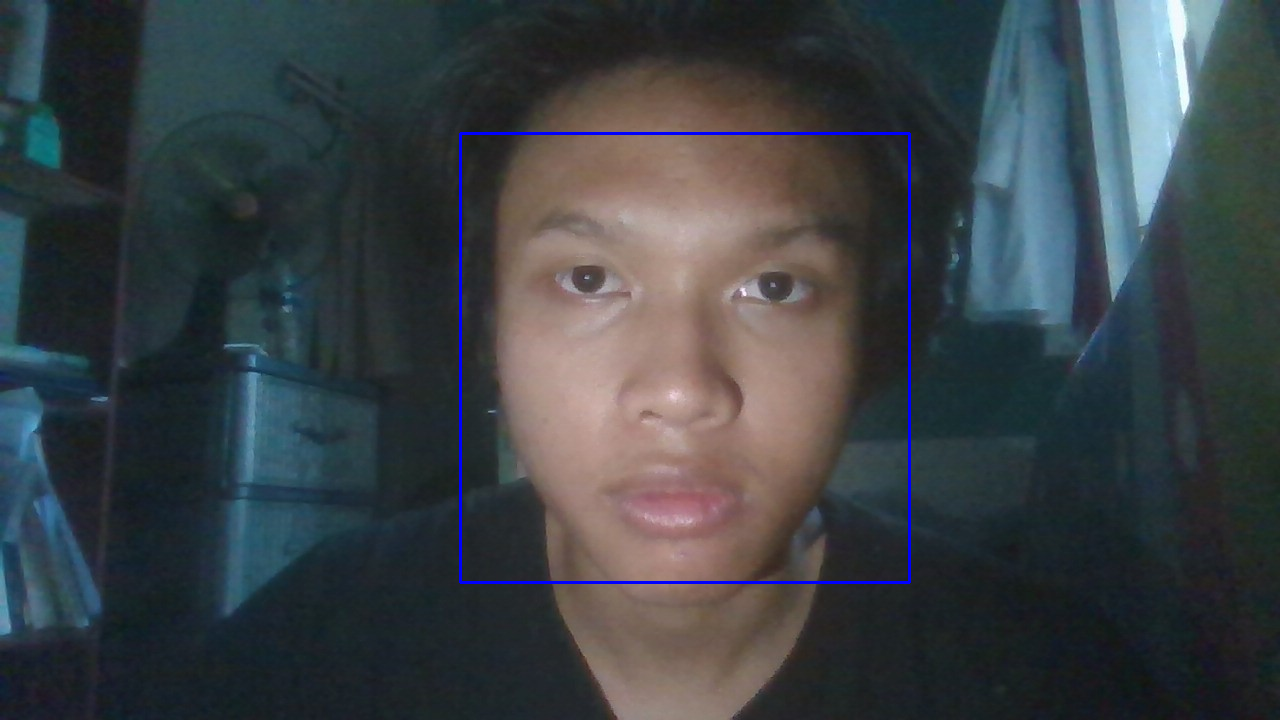

In [ ]:
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError('Haar Cascade classifier file tidak ditemukan!')

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# Gambar kotak di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
cv2_imshow(image)

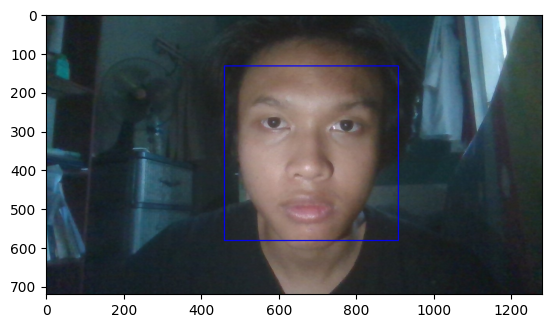

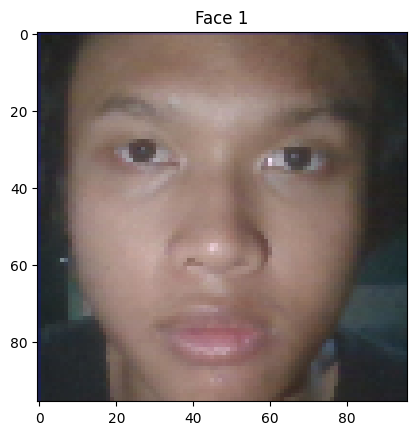

In [ ]:
cropped_faces = []
for (x, y, w, h) in faces:
    # Crop wajah
    face = image[y:y+h, x:x+w]

    # Resize wajah ke ukuran 96x96
    resized_face = cv2.resize(face, (96, 96))
    cropped_faces.append(resized_face)

    # Gambar kotak di sekitar wajah yang terdeteksi
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
plt.imshow(image_rgb)
plt.show()

# Menampilkan wajah yang telah di-crop dan di-resize
for idx, cropped_face in enumerate(cropped_faces):
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))  # Konversi ke RGB
    plt.title(f"Face {idx+1}")
    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load model
model_path = '/content/trained_model/model_full.h5'  # Ganti dengan path model Anda
model = tf.keras.models.load_model(model_path)

# Fungsi preprocessing wajah
def preprocess_face(face):
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale
    face_resized = cv2.resize(face_gray, (96, 96))  # Resize ke 96x96
    face_normalized = face_resized / 255.0  # Normalisasi piksel
    face_input = np.expand_dims(face_normalized, axis=-1)  # Tambahkan channel (1)
    face_input = np.expand_dims(face_input, axis=0)  # Tambahkan batch (1, 96, 96, 1)
    return face_input

# Proses setiap wajah yang di-crop
for idx, cropped_face in enumerate(cropped_faces):
    # Preprocess wajah
    face_input = preprocess_face(cropped_face)

    # Prediksi keypoints
    keypoints = model.predict(face_input)  # Output (1, N*2)
    keypoints = keypoints.reshape(-1, 2)  # Ubah ke bentuk (N, 2)

    # Tampilkan array keypoints
    print(f"Face {idx+1} Keypoints Array:")
    print(keypoints)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
Face 1 Keypoints Array:
[[69.55007  35.43527 ]
 [27.628876 33.17557 ]
 [59.62737  37.506493]
 [74.34664  37.27504 ]
 [35.982555 37.185535]
 [21.697554 37.55001 ]
 [56.049156 29.66413 ]
 [80.6881   30.098648]
 [39.200733 29.389263]
 [15.236423 30.19016 ]
 [47.89192  63.754723]
 [62.00419  76.49272 ]
 [33.310886 76.40371 ]
 [47.762825 72.90989 ]
 [47.184517 80.4782  ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


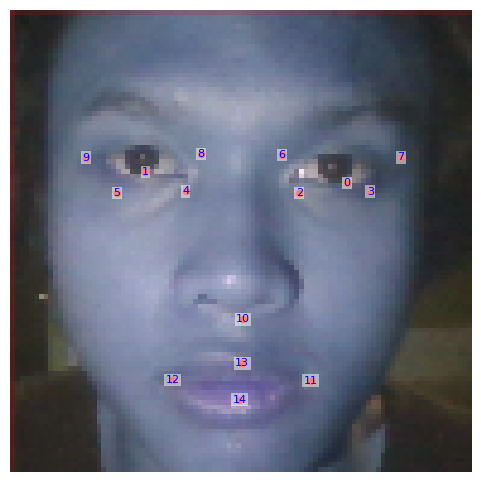

In [ ]:
def show_example(image, keypoints, landmark_labels=None):
    """
    Menampilkan satu gambar dengan keypoints beserta label atau nomor indeks di setiap titik.

    Parameters:
    - image: Gambar input dalam format grayscale (H, W) atau (H, W, 1)
    - keypoints: Array keypoints dalam format (N, 2)
    - landmark_labels: List label untuk setiap keypoint (default: None)
    """
    # Pisahkan koordinat x dan y
    x_points = keypoints[:, 0]
    y_points = keypoints[:, 1]

    # Plot gambar dan keypoints
    plt.figure(figsize=(6, 6))
    plt.imshow(image.squeeze(), cmap='gray')  # Tampilkan gambar
    plt.scatter(x_points, y_points, s=20, color='red')  # Plot keypoints

    # Tambahkan nomor indeks atau label di setiap keypoint
    for i, (x, y) in enumerate(keypoints):
        label = landmark_labels[i] if landmark_labels is not None else str(i)
        plt.text(x, y, label, color='blue', fontsize=8, ha='center', va='center',
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

    plt.axis('off')  # Hilangkan axis untuk estetika
    plt.show()

# Ambil satu cropped face dan prediksi keypoints-nya
cropped_face = cropped_faces[0]  # Pilih wajah pertama atau indeks lainnya
face_input = preprocess_face(cropped_face)

# Prediksi keypoints
keypoints = model.predict(face_input).reshape(-1, 2)

# Tampilkan gambar dan keypoints
show_example(cropped_face, keypoints)